# **<center>Stock Price Prediction with Technical Analysis</center>**
### **This notebook has been developed for educational and fun purposes only and is absolutly not financial advice!!!**
**Stock**
* Stocks, each unit of which is called a share, represent ownership of a company. Stocks, owned either directly or through a mutual fund or ETF, will likely form the majority of most investor's portfolios. 

In [87]:
!pip install yfinance==0.2.12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

  Using cached yfinance-0.2.12-py2.py3-none-any.whl (59 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.18
    Uninstalling yfinance-0.2.18:
      Successfully uninstalled yfinance-0.2.18


In [88]:
 df = yf.download("PEP", start="2010-01-01", end="2023-05-20")
 df=df.round(2)

[*********************100%***********************]  1 of 1 completed


In [89]:
df.sort_values(by ='Date', ascending = False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-19,192.46,192.86,191.10,191.84,191.84,3883000
2023-05-18,191.32,191.71,190.41,191.56,191.56,3709400
2023-05-17,193.31,193.59,190.84,192.06,192.06,4878800
2023-05-16,194.48,194.48,192.54,193.43,193.43,5803100
2023-05-15,196.57,196.88,194.00,194.27,194.27,2946400


### **Key Definitions**
**Open:** The opening price of a stock at the beginning of a trading day.

**High:** The highest price a stock reaches during a trading day.

**Low:** The lowest price a stock reaches during a trading day.

**Close:** The closing price of a stock at the end of a trading day.

**Adj Close:** The adjusted closing price of a stock, which takes into account any dividends, stock splits, or other corporate actions that occurred during the day.

**Volume:** The number of shares of a stock that were traded during a particular trading day. This is an important indicator of market activity and can provide insight into the level of buying and selling interest in a particular stock.

In [90]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,196.57,196.88,194.00,194.27,194.27,2946400
2023-05-16,194.48,194.48,192.54,193.43,193.43,5803100
2023-05-17,193.31,193.59,190.84,192.06,192.06,4878800
2023-05-18,191.32,191.71,190.41,191.56,191.56,3709400
2023-05-19,192.46,192.86,191.10,191.84,191.84,3883000


In [91]:
df.shape

(3368, 6)

In [92]:
df = df.reset_index()

In [93]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [94]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [95]:
df['Date'].max() - df['Date'].min()

Timedelta('4883 days 00:00:00')

**High-level overview of how the Pepsi stock performed in about last couple of months** 

In [96]:
df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,179,180,178,179,179,4416094
std,7,7,8,8,8,1318988
min,168,169,167,169,167,2209900
25%,173,174,171,173,173,3642875
50%,176,177,175,176,176,4257100
75%,184,185,184,184,184,5032600
max,196,196,194,196,196,9619400


In [97]:
df.index = df['Date']

**Now plot the closing price (adjusted) of the stock over the period of 14 years to get a general idea of how the stock performed in the given period**

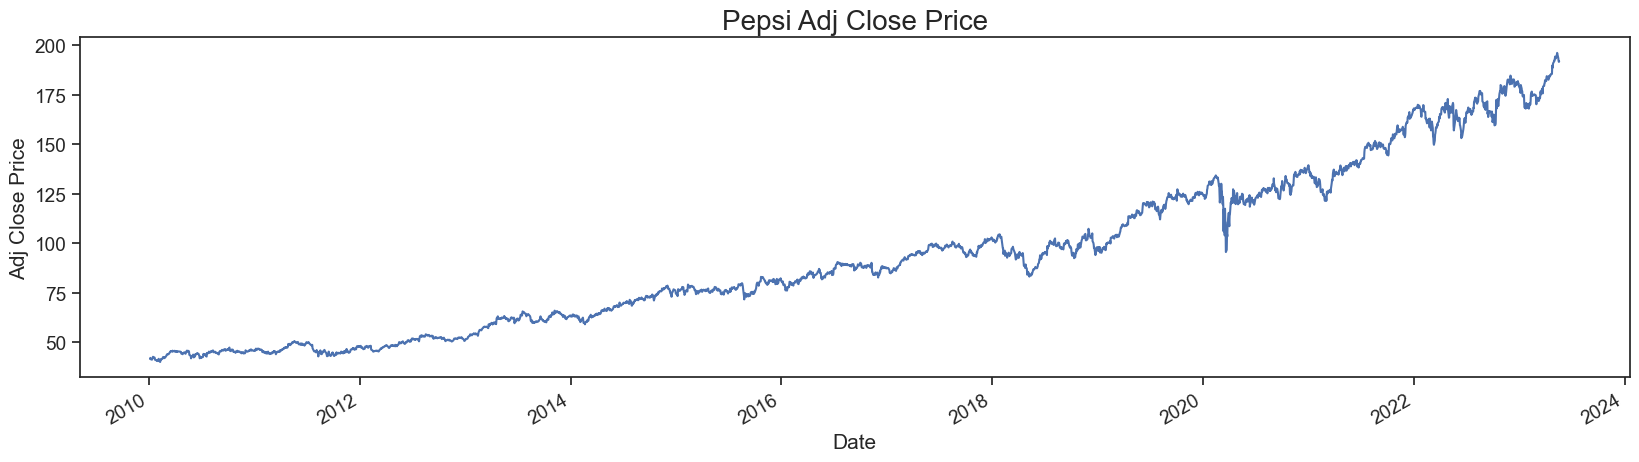

In [98]:
df['Adj Close'].plot(figsize = (20,5))
plt.title("Pepsi Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

**Let's plot for last 2 years and see the trends**

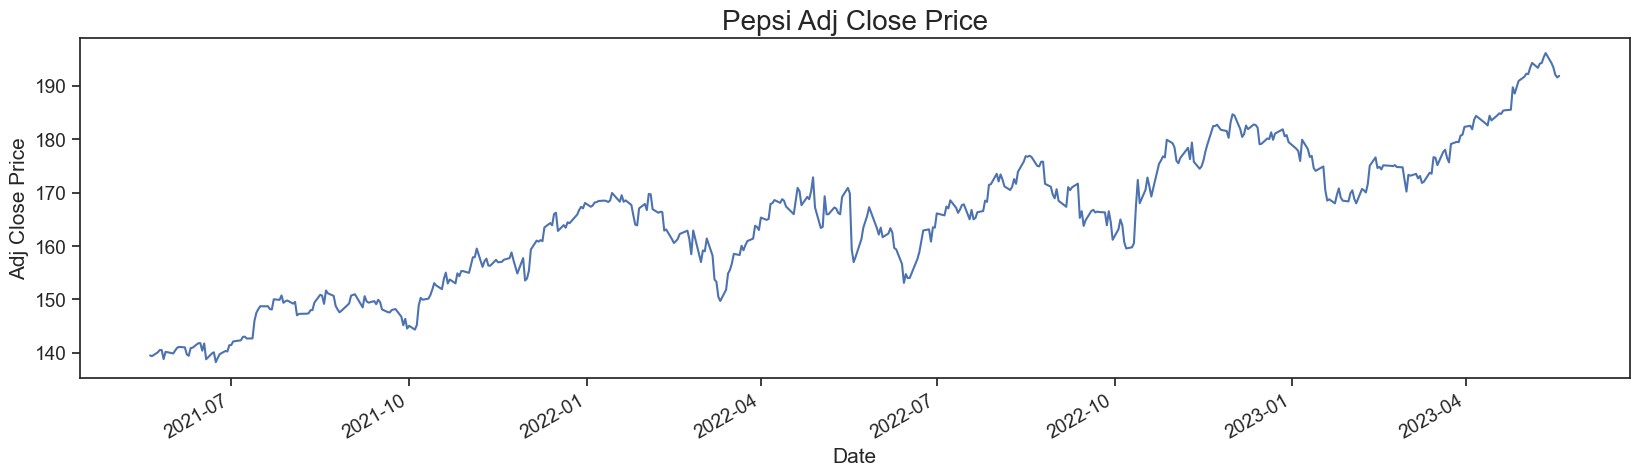

In [99]:
df['Adj Close'].iloc[-504:].plot(figsize = (20,5))
plt.title("Pepsi Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

## **Day-to-day percentage change(Daily returns)**

In [100]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2010-01-04,2010-01-04,61.19,61.52,60.64,61.24,41.63,6585900,NaN
2010-01-05,2010-01-05,61.00,62.10,60.90,61.98,42.14,8886000,1.225078
2010-01-06,2010-01-06,61.99,62.47,61.23,61.36,41.71,9998000,-1.020408
2010-01-07,2010-01-07,61.35,61.38,60.53,60.97,41.45,10792000,-0.623352
2010-01-08,2010-01-08,60.76,60.82,60.27,60.77,41.31,8674700,-0.337756


In [101]:
# Drop 1st value because it is Nan
df.dropna(axis = 0, inplace = True)

**Plot a graph for daily returns over the priods of 13 years**

Text(0, 0.5, 'Percenatge returns')

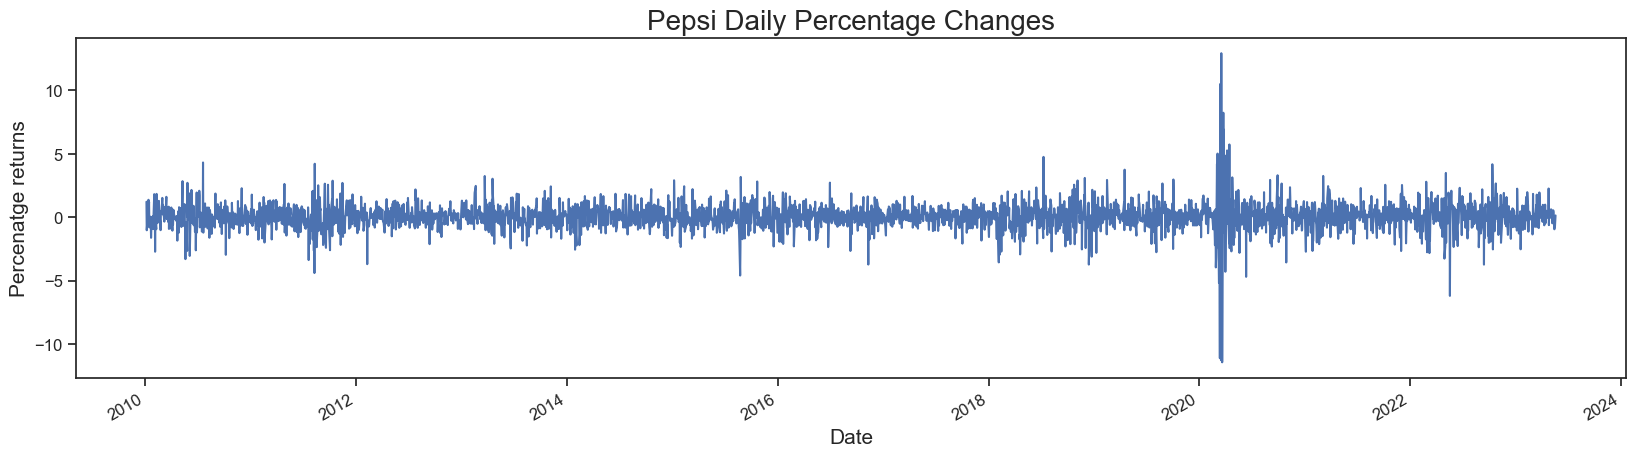

In [102]:
df['Day_Perc_Change'].plot(figsize = (20, 5), fontsize = 12)
plt.title("Pepsi Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

**Plot a graph for daily returns over the priods of 2 years**

Text(0, 0.5, 'Percenatge returns')

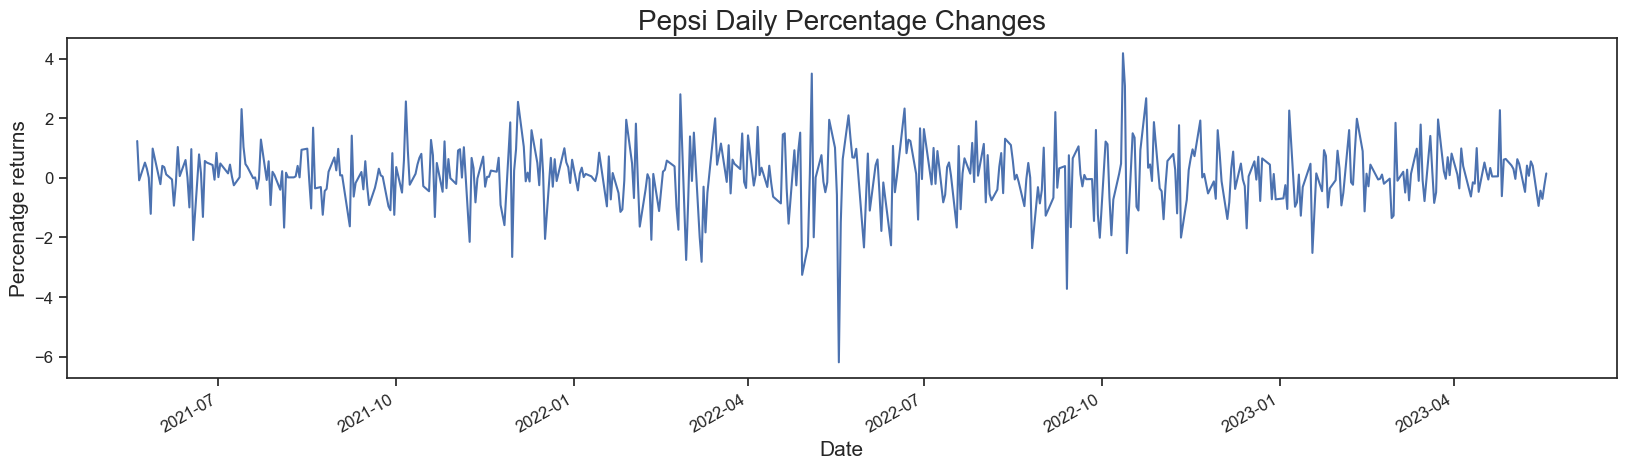

In [103]:
df['Day_Perc_Change'].iloc[-504:].plot(figsize = (20, 5), fontsize = 12)
plt.title("Pepsi Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, in thelast 2 years the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with one instance of drastic negative changes in the month of Jan'23 due to hindenburg report

**Plot daily return distribution histogram**

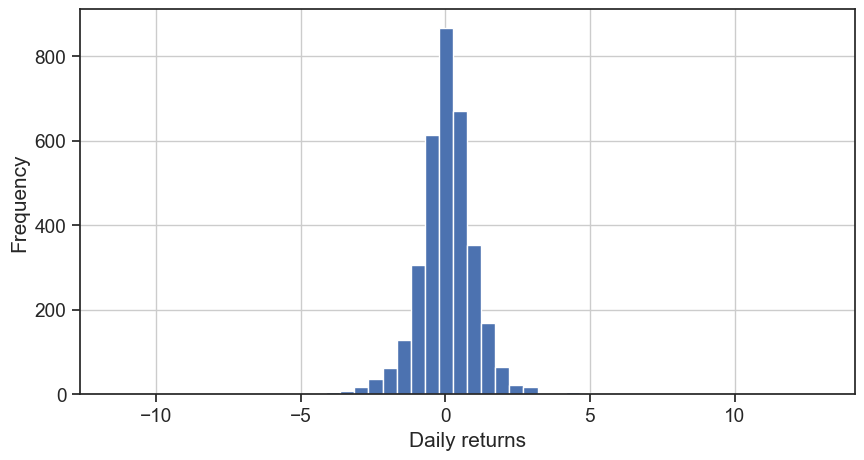

------------------------------------
Basic Statisics for Daily Percentages for 13 years


count    3367.000000
mean        0.051347
std         1.090914
min       -11.428307
25%        -0.465977
50%         0.047519
75%         0.580301
max        12.933936
Name: Day_Perc_Change, dtype: float64

In [104]:
df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 13 years")
df['Day_Perc_Change'].describe()

**Plot daily return distribution histogram over the priods of 2 years**

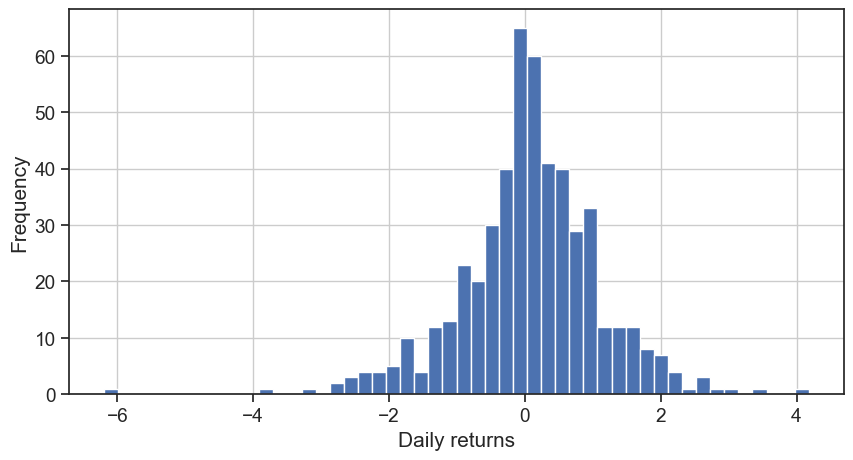

------------------------------------
Basic Statisics for Daily Percentages for 2 years


count    504.000000
mean       0.071163
std        1.046479
min       -6.192607
25%       -0.435193
50%        0.082297
75%        0.653485
max        4.180685
Name: Day_Perc_Change, dtype: float64

In [105]:
df['Day_Perc_Change'].iloc[-504:].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 2 years")
df['Day_Perc_Change'].iloc[-504:].describe()

## **Trend Analysis**
**Trend is determined from below relationship —**
<center>
<table>
  <tr>
    <th>Daily Percentage Change</th>
    <th>Trend</th>
  </tr>
  <tr>
    <td>-0.5 to 0.5</td>
    <td>Slight or No Change</td>
  </tr>
  <tr>
    <td>0.5 to 1</td>
    <td>Slight Positive</td>
  </tr>
  <tr>
    <td>-0.5 to -1</td>
    <td>Slight Negative</td>
  </tr>
  <tr>
    <td>1 to 3</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>-1 to -3</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>3 to 7</td>
    <td>Among Top Gainers</td>
  </tr>
  <tr>
    <td>-3 to -7</td>
    <td>Among Top Losers</td>
  </tr>
  <tr>
    <td>Above 7</td>
    <td>Bull Run</td>
  </tr>
  <tr>
    <td>Below 7</td>
    <td>Bear Drop</td>
  </tr>
</table>
</center>

In [106]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2010-01-05,2010-01-05,61.00,62.10,60.90,61.98,42.14,8886000,1.225078,Positive
2010-01-06,2010-01-06,61.99,62.47,61.23,61.36,41.71,9998000,-1.020408,Negative
2010-01-07,2010-01-07,61.35,61.38,60.53,60.97,41.45,10792000,-0.623352,Slight Negative
2010-01-08,2010-01-08,60.76,60.82,60.27,60.77,41.31,8674700,-0.337756,Slight or No change
2010-01-11,2010-01-11,60.68,60.81,60.10,60.70,41.27,6461200,-0.096829,Slight or No change


### **Pie chart**

**Past 13 years trend**

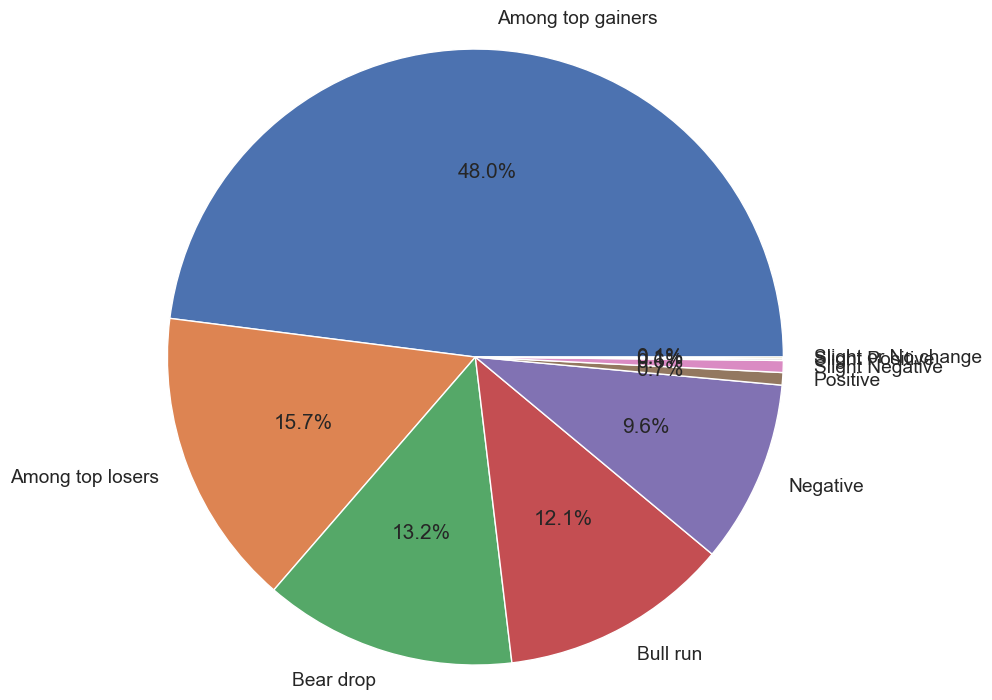

In [107]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

**Past 2 years trend**

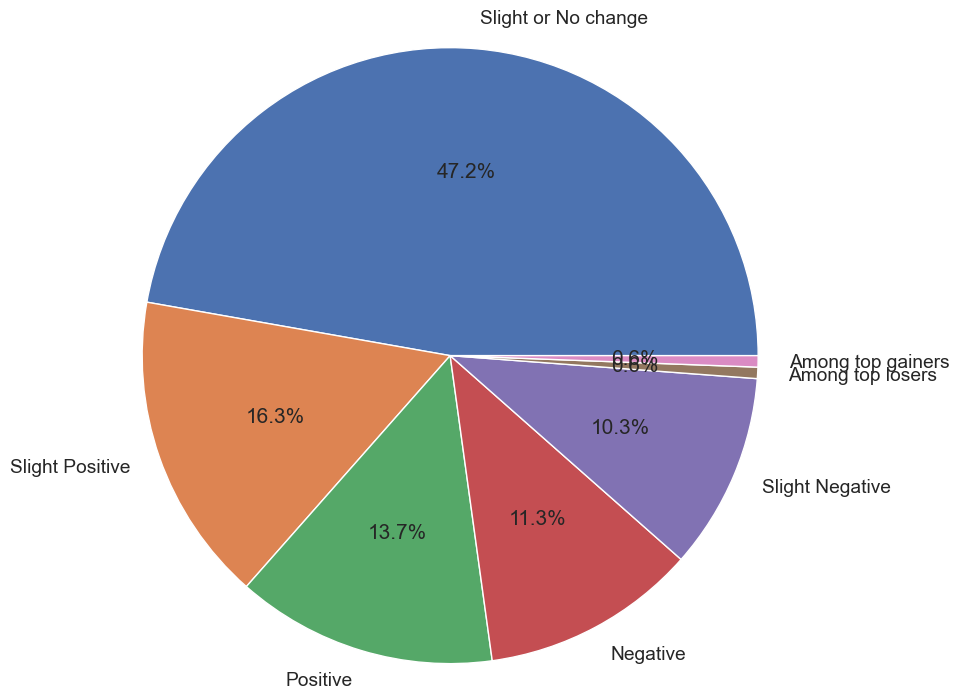

In [108]:
plt.figure(figsize=(20, 5))
trend_counts = df['Trend'].iloc[-504:].value_counts()
pie_label = trend_counts.index.tolist()  # Get the unique categories as labels
plt.pie(trend_counts, labels=pie_label, autopct='%1.1f%%', radius=2)
plt.show()

## **Daily Returns and Volume**

**FOr 13 years period**

<Axes: xlabel='Date'>

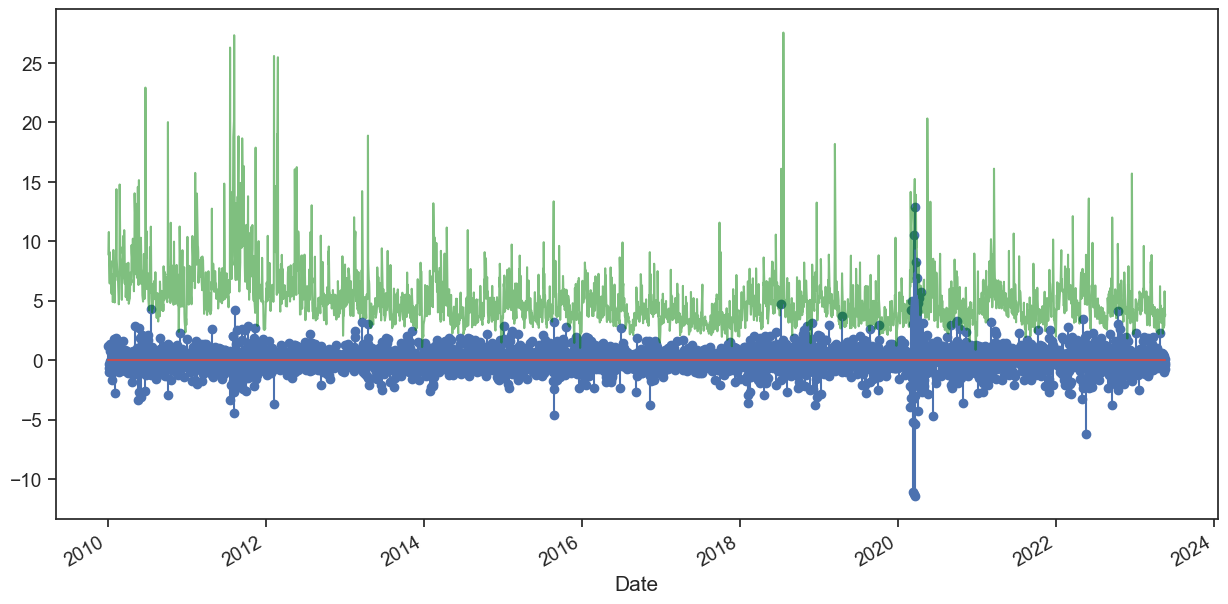

In [109]:
plt.stem(df['Date'], df['Day_Perc_Change'])
(df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

**FOr 2 years period**

<Axes: xlabel='Date'>

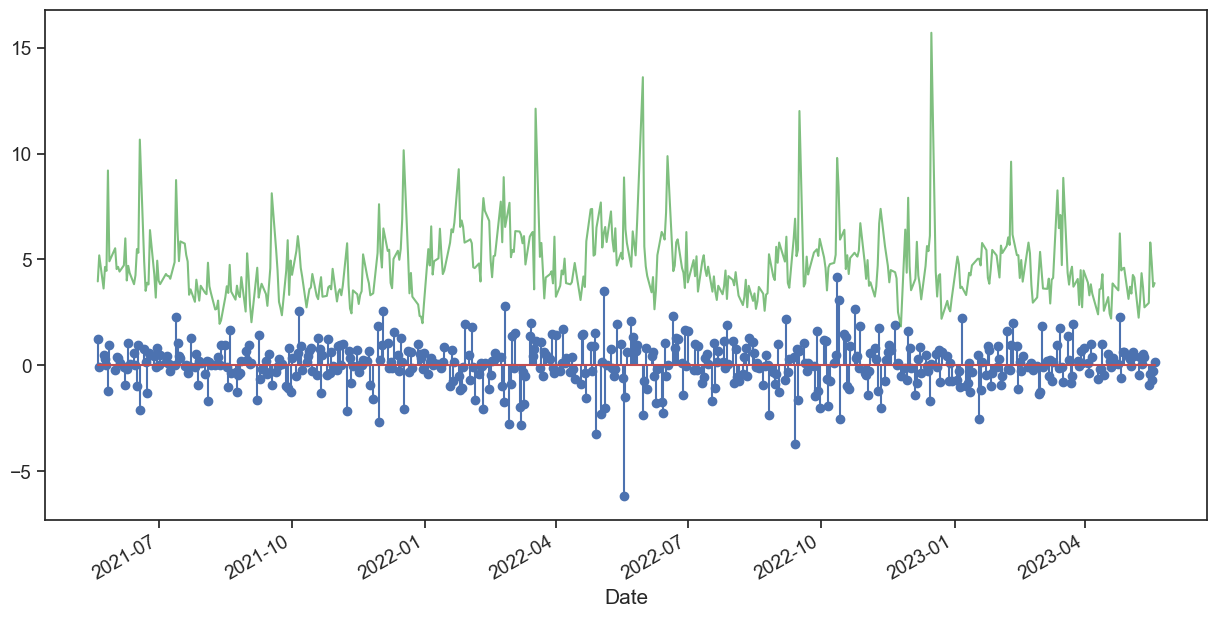

In [110]:
plt.stem(df['Date'].iloc[-504:], df['Day_Perc_Change'].iloc[-504:])
(df['Volume'].iloc[-504:]/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

## **Correlation Analysis Of Stocks with Pair plot and Joint plots**
* “Never put all your eggs in a single basket”

* Whenever we go for the diversification of the portfolio, we would NOT want the stocks to be related to each other. Mathematically, Pearson's correlation coefficient (also called Pearson's R value) between any pair of stocks should be close to 0. The idea behind is simple — suppose your portfolio comprises of the stocks that are highly correlated, then if one stock tumbles, the others might fall too and you're at the risk of losing all your investment!

* I selected the aforementioned stocks to perform the correlation analysis. All these stocks are from different segments of Industry and Market cap. You are free to choose the stocks of your interest. the procedure remains the same.


In [111]:
# Adj close price of all the stocks
combined_df = yf.download(["PEP","UNH","GM","JNJ"], start="2010-01-01", end="2023-05-12")['Adj Close']
combined_df = combined_df.round(2)
combined_df.head()

[*********************100%***********************]  4 of 4 completed


,GM,JNJ,PEP,UNH
Date,,,,
2010-01-04,NaN,43.96,41.63,25.89
2010-01-05,NaN,43.45,42.14,25.85
2010-01-06,NaN,43.81,41.71,26.10
2010-01-07,NaN,43.49,41.45,27.11
2010-01-08,NaN,43.64,41.31,26.85


### **Pairplot**

<Figure size 2000x500 with 0 Axes>

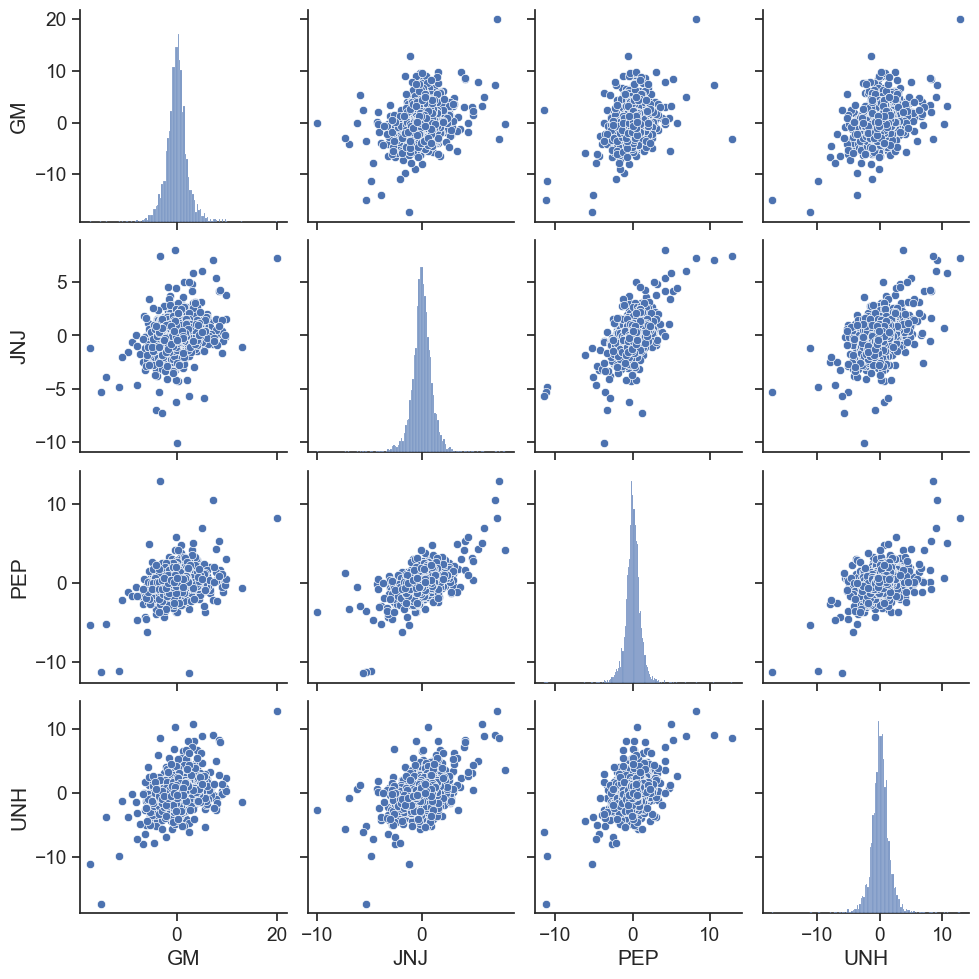

In [112]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
plt.figure(figsize = (20,5))
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

* ***Correlation analysis is performed on the daily percentage change(daily returns) of the stock price and not on the stock price.***

### **Jointplot**
* While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot provides detailed information like Pearson's R value (Pearson's correlation coefficient) for each pair of stocks. Pearson's R value ranges from -1 to 1. Negative value indicates a negative linear relation between the variables, while positive value indicates a positive relationship. Pearson's R value closer to 1 (or -1) indicates strong correlation, while value closer to 0 indicates weak correlation.

* In addition to Pearson's R value, joint plot also shows the respective histograms on the edges as well as null hypothesis p-value.



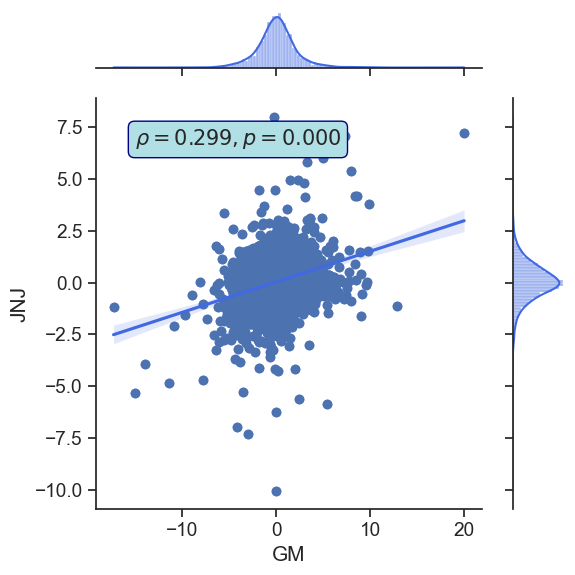

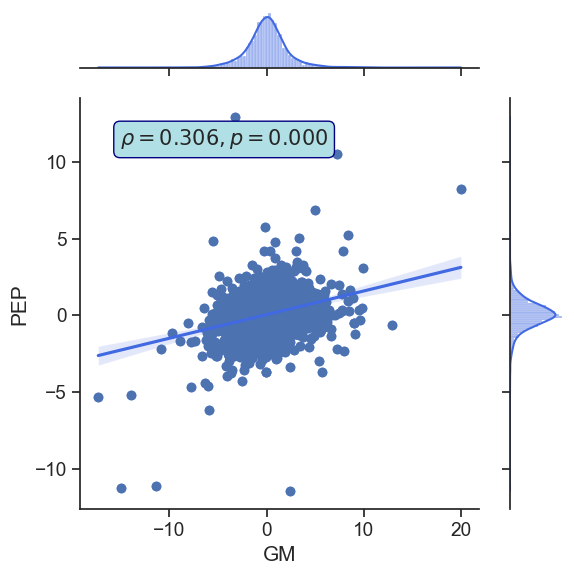

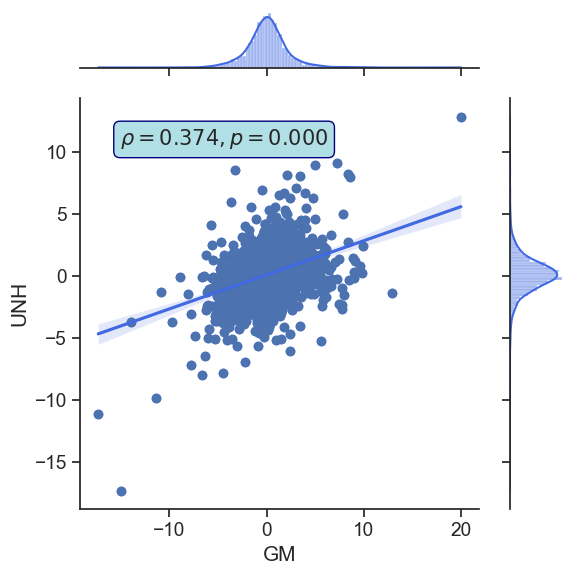

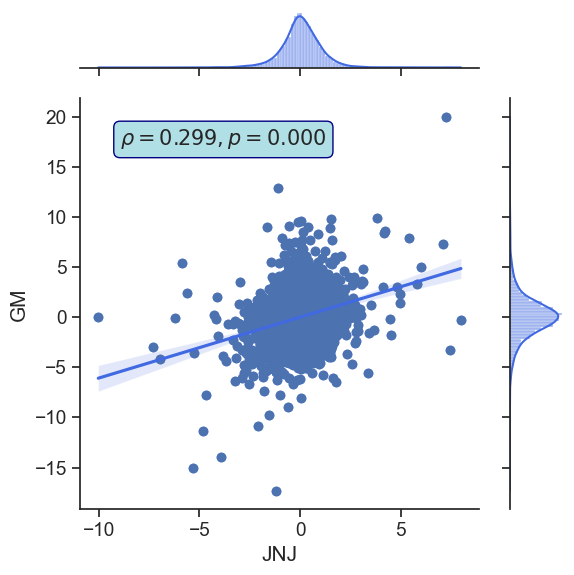

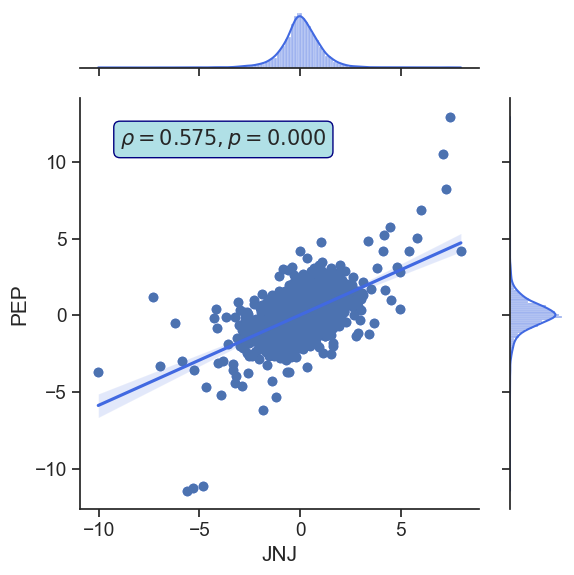

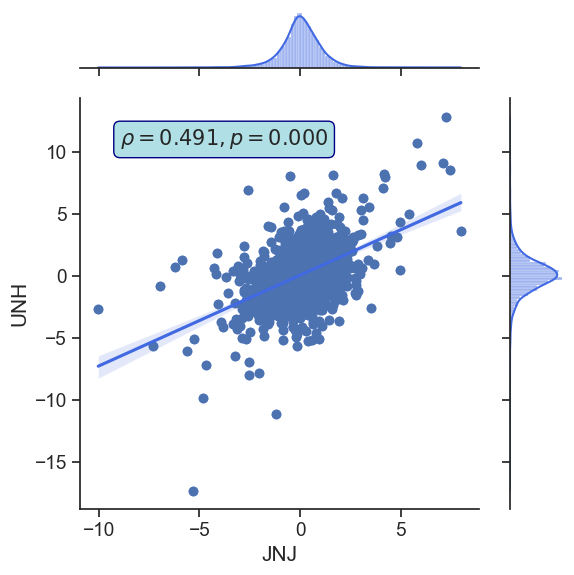

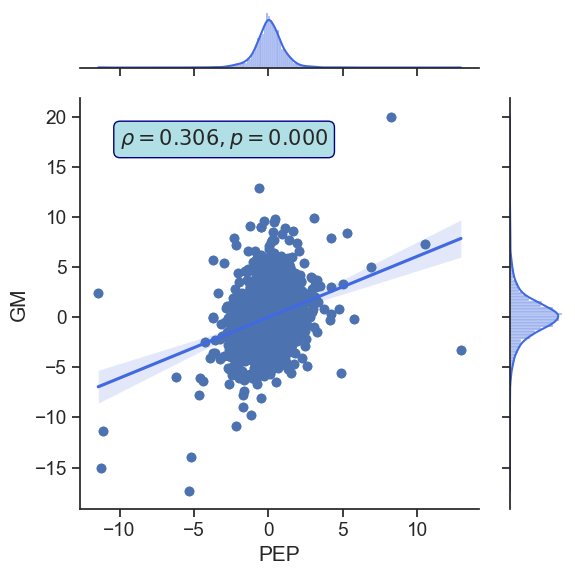

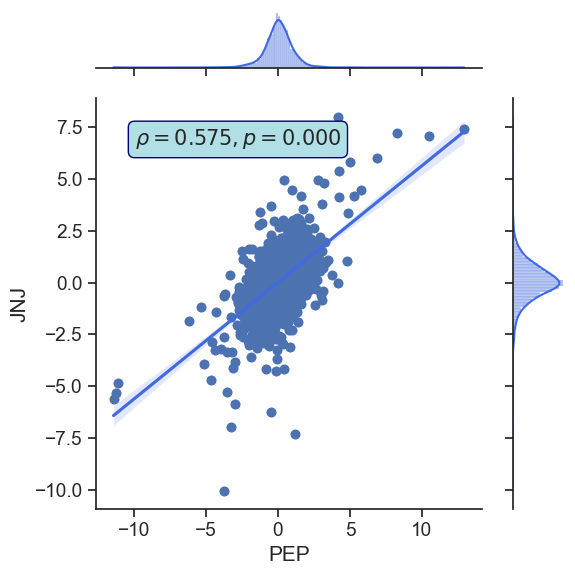

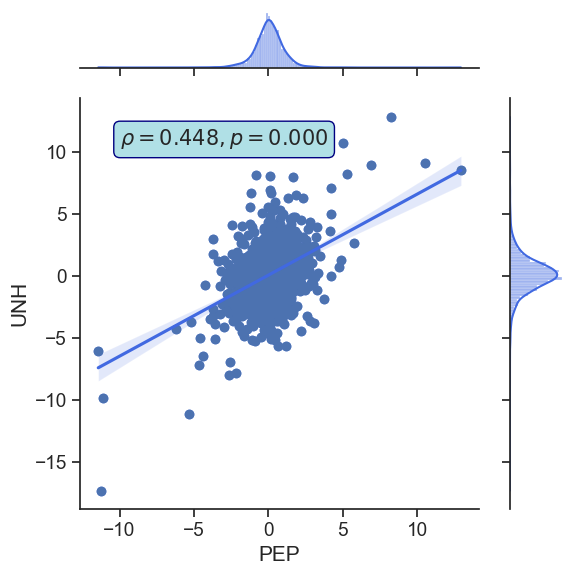

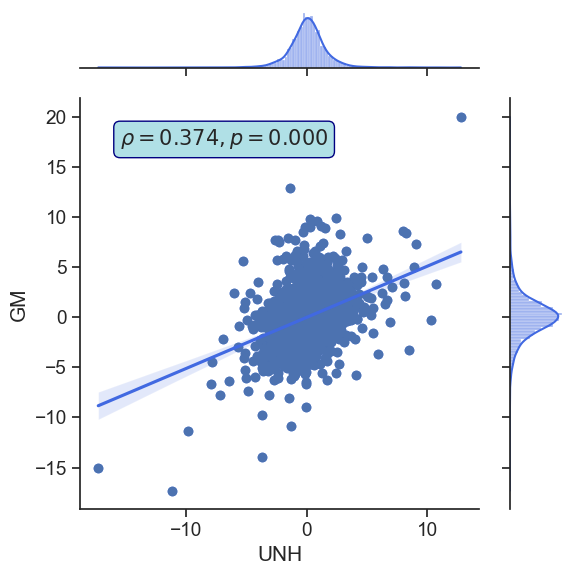

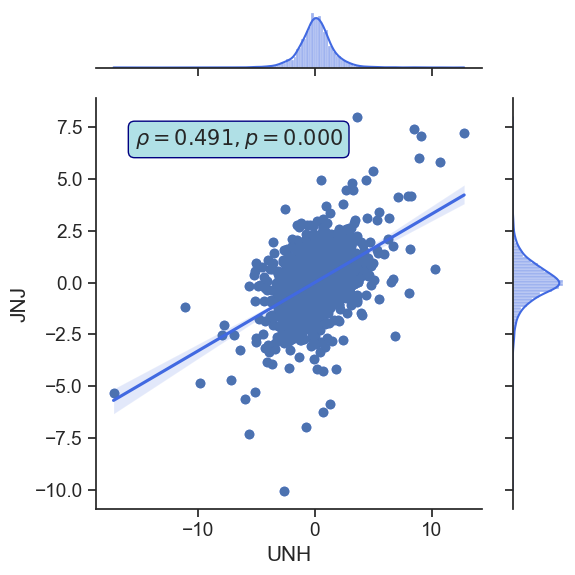

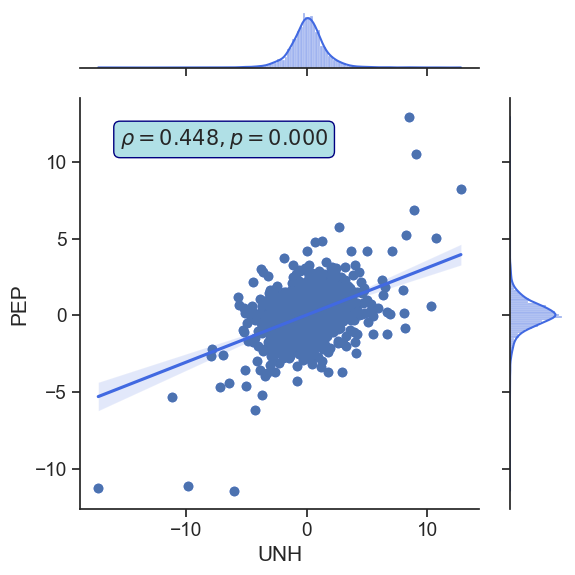

In [113]:
from scipy.stats import stats

def joint_plot(df, a, b):
  g = sns.jointplot(x=df[a], y=df[b], kind='reg', color='royalblue')
  r, p = stats.pearsonr(df[a], df[b])
  g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
  g.ax_joint.scatter(df[a], df[b])
  g.set_axis_labels(xlabel=a, ylabel=b, size=15)
  plt.tight_layout()
  return g
index = 1
for i in pct_chg_df.columns:
  for j in pct_chg_df.columns:
      if i!=j:
        joint_plot(pct_chg_df,i,j)

Text(0.5, 1.0, 'Pepsi Volatility')

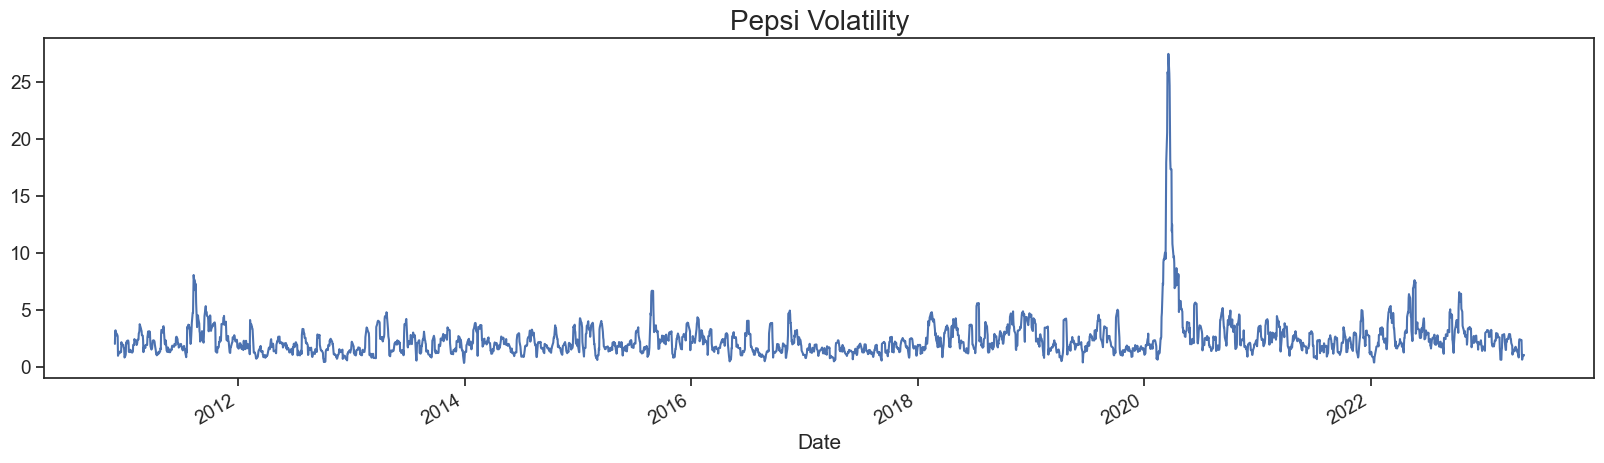

In [114]:
Pepsi_vol = pct_chg_df['PEP'].rolling(7).std()*np.sqrt(7)
Pepsi_vol.plot(figsize = (20, 5))
plt.title("Pepsi Volatility", fontsize = 20)

Text(0.5, 1.0, 'Stock Returns Volatility')

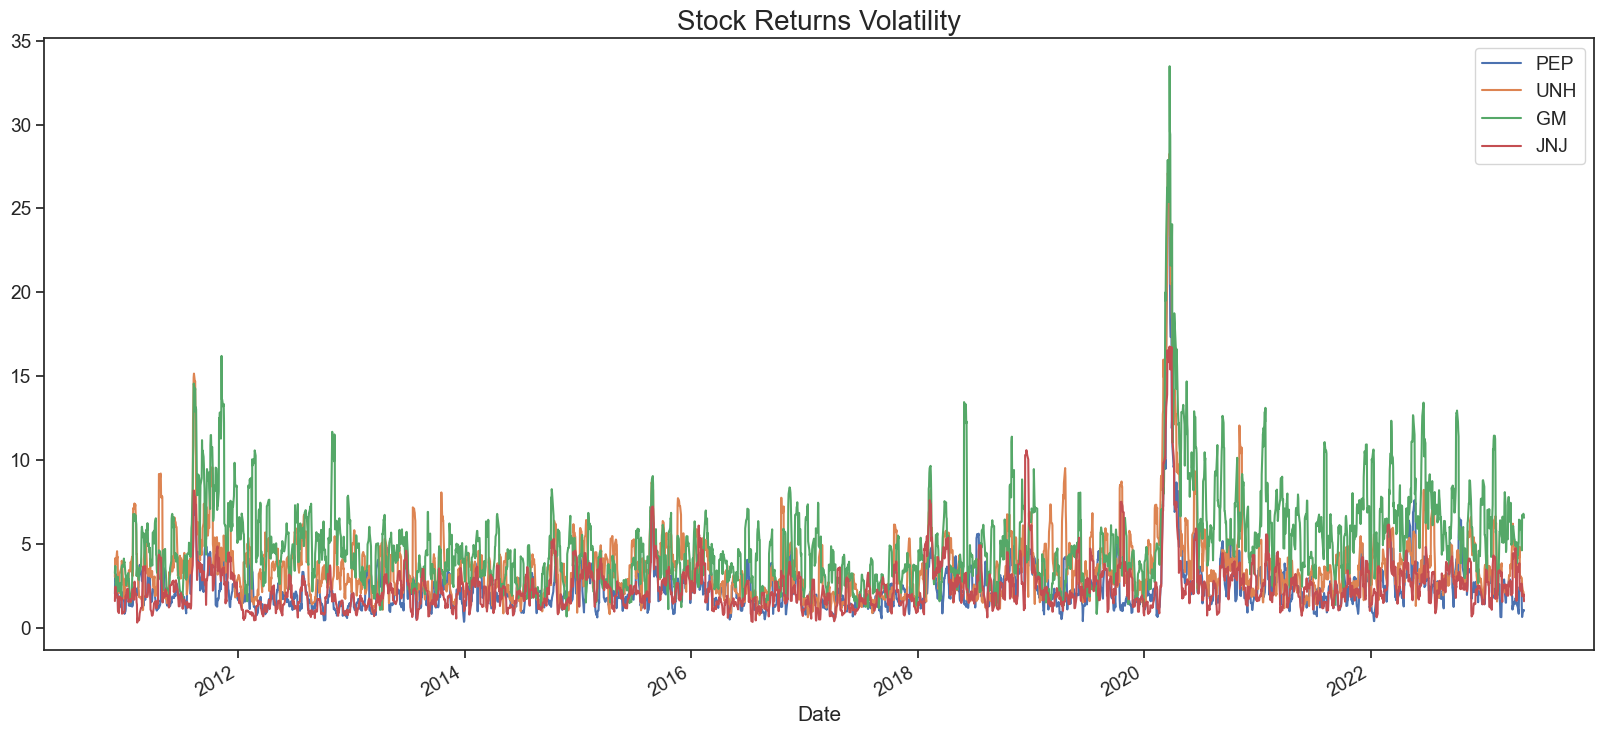

In [115]:
volatility = pct_chg_df[["PEP","UNH","GM","JNJ"]].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (20, 9))
plt.title("Stock Returns Volatility", fontsize = 20)

## **Technical Analysis**
**Technical Indicators**
* Investors usually perform due diligence on a handful of companies to select their target companies. There is no guarantee that an investor will make money and some investors lose some, if not all, of their investments hence it is wise not to invest in a company that is going to go bust or that is overvalued and its share price is already too high.

* Investors usually perform fundamental analysis on a company to understand whether it is worth buying its stock. Once they have selected the chosen companies to invest their money in, they then need to evaluate when to buy the stock. Time is important in stock investing too. This is where the technical indicators can come in handy.

* ***An investor performs technical analysis to compute technical indicators. These indicators can help an investor determine when to buy or sell a stock.***

* There are a large number of technical indicators available that are used by the investors. The key is to use a handful of them that meets the trading strategies of the investors and make sense for the current market situation. Too many indicators can clutter the charts and add unnecessary noise.

* The technical indicators use the OHLCV data. it means the open, high, low, close, and volume of trades. These measures of a stock can be used to compute technical indicators.

* The technical indicators can help us with our investment choices.

* There is a large number of technical indicators available. The technical indicators can be grouped into Momentum Indicators, Volume Indicators, Volatility Indicators, Trend Indicators, and Others Indicators.

### **Crossover Analysis**

A crossover analysis is a technical analysis technique used to identify potential buy and sell signals in a stock's price trend.

<br>

To perform a crossover analysis, you will need to plot two moving averages for the stock price, typically a shorter-term moving average (e.g. 50-day moving average) and a longer-term moving average (e.g. 200-day moving average). The crossover occurs when the shorter-term moving average crosses above or below the longer-term moving average, indicating a potential trend reversal.

The rolling function is used to calculate the rolling mean (moving average) of the closing price over a specified window size (50 days and 200 days in this example). The fill_between function is used to highlight the regions where the 50-day moving average is above or below the 200-day moving average.

<br><br>

Crossover analysis is just one of many technical analysis tools used to analyze stock prices, and should not be used in isolation to make investment decisions. It's important to also consider fundamental analysis, market trends, and other factors that may affect the stock price.

The crossover points are where the 50-day moving average crosses over or under the 200-day moving average. These points can be used as potential buy or sell signals for the stock, depending on the direction of the crossover.

### **Simple Moving Average Technical Indicator**

* The simple moving average (SMA) is a widely used technical analysis tool that helps smooth out price action by calculating the average price of a security over a specific period of time, usually 20, 50, or 200 days.


* The simple moving average is used by traders to identify trend direction and potential support and resistance levels. ***When the price is above the SMA, it is considered bullish, and when it is below the SMA, it is considered bearish.*** In this case, since the price is above the 50-day SMA, it can be considered as bullish.

* One important thing to note about ***SMA*** is that it ***gives equal weightage to all the price points in the time period being considered.*** So, the **more recent prices are given the same weightage as the older prices. *** Therefore, it may not be the most effective tool in volatile markets where prices can fluctuate rapidly.***

* ***The formula for calculating the SMA is as follows:***

* ***SMA = (Sum of prices over a given period) / (Number of prices in that period)***

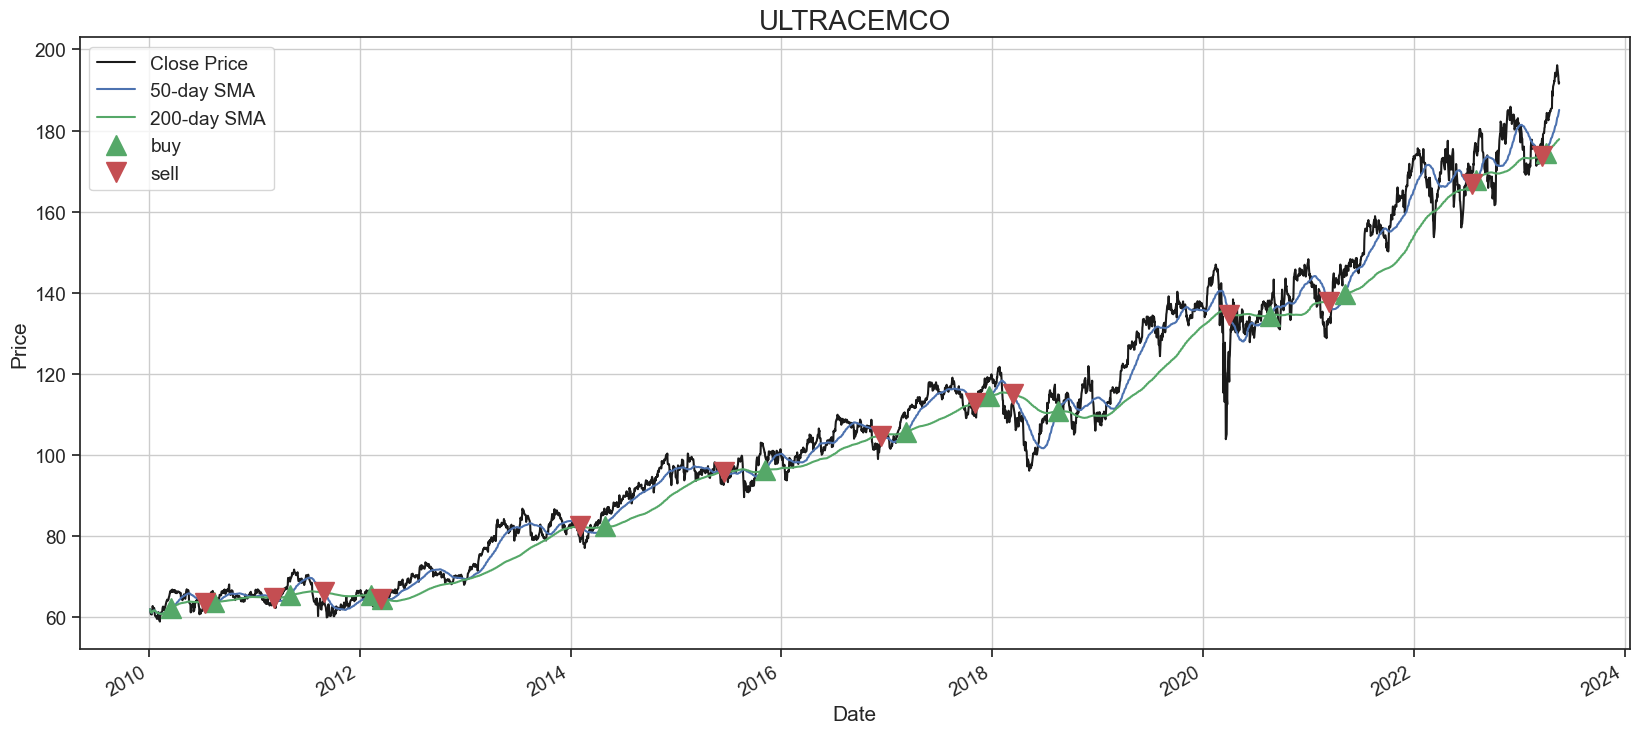

In [116]:
# create 20 days simple moving average column
df['50_SMA'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# create 50 days simple moving average column
df['200_SMA'] = df['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
df['Signal'] = 0.0
df['Signal'] = np.where(df['50_SMA'] > df['200_SMA'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()
plt.figure(figsize = (20,9))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['50_SMA'].plot(color = 'b',label = '50-day SMA') 
df['200_SMA'].plot(color = 'g', label = '200-day SMA')
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index, df['50_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].index, df['200_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

#### **Mathematical Intution**

* The crossover points are where ***the two moving averages intersect***. These points represent potential buy or sell signals for the stock, depending on the direction of the crossover.

* Mathematically, we can calculate the moving averages as follows:

**Simple Moving Average = Sum of stock prices over the period / Number of periods**

* We can then compare the 50-day and 200-day moving averages using the following 

**Strategy:**
1. **If 50-day moving average > 200-day moving average, it is a bullish signal**

2. **If 50-day moving average < 200-day moving average, it is a bearish signal.**

The crossover points occur when the two moving averages intersect. At this point, the direction of the crossover will determine whether it is a potential buy or sell signal for the stock.

<br>



### **Exponential Moving Average Technical Indicator**

* The **exponential moving average (EMA)** is a type of moving average that gives ***greater weight to more recent data in the time series, while also taking into account older data.*** The EMA is calculated using a smoothing factor that places a greater weight on recent data points. ***This can make it more responsive to price changes compared to a simple moving average (SMA).***


* As we can see from the plot, the **EMA generally tracks the closing price quite closely.** ***We can also see that there are several instances where the buying and selling signals are generated***, indicating potential opportunities to enter or exit the market.

* **It's important to note that this is just one of many technical indicators that can be used to analyze stock prices, and it should be used in conjunction with other indicators and fundamental analysis to make informed trading decisions.**

<br>

* ***The formula for calculating exponential moving average (EMA) is as follows:***

 **EMA = (Close - EMA_prev) * multiplier + EMA_prev**
<br>

 ***Where:***

* Close is the current closing price of the asset
* **EMA_prev** is the previous period's EMA
multiplier is a smoothing factor that determines the weight of the current period's price in the calculation. 
* **The formula for calculating the multiplier is: 2 / (N + 1), where N is the number of periods in the EMA.**





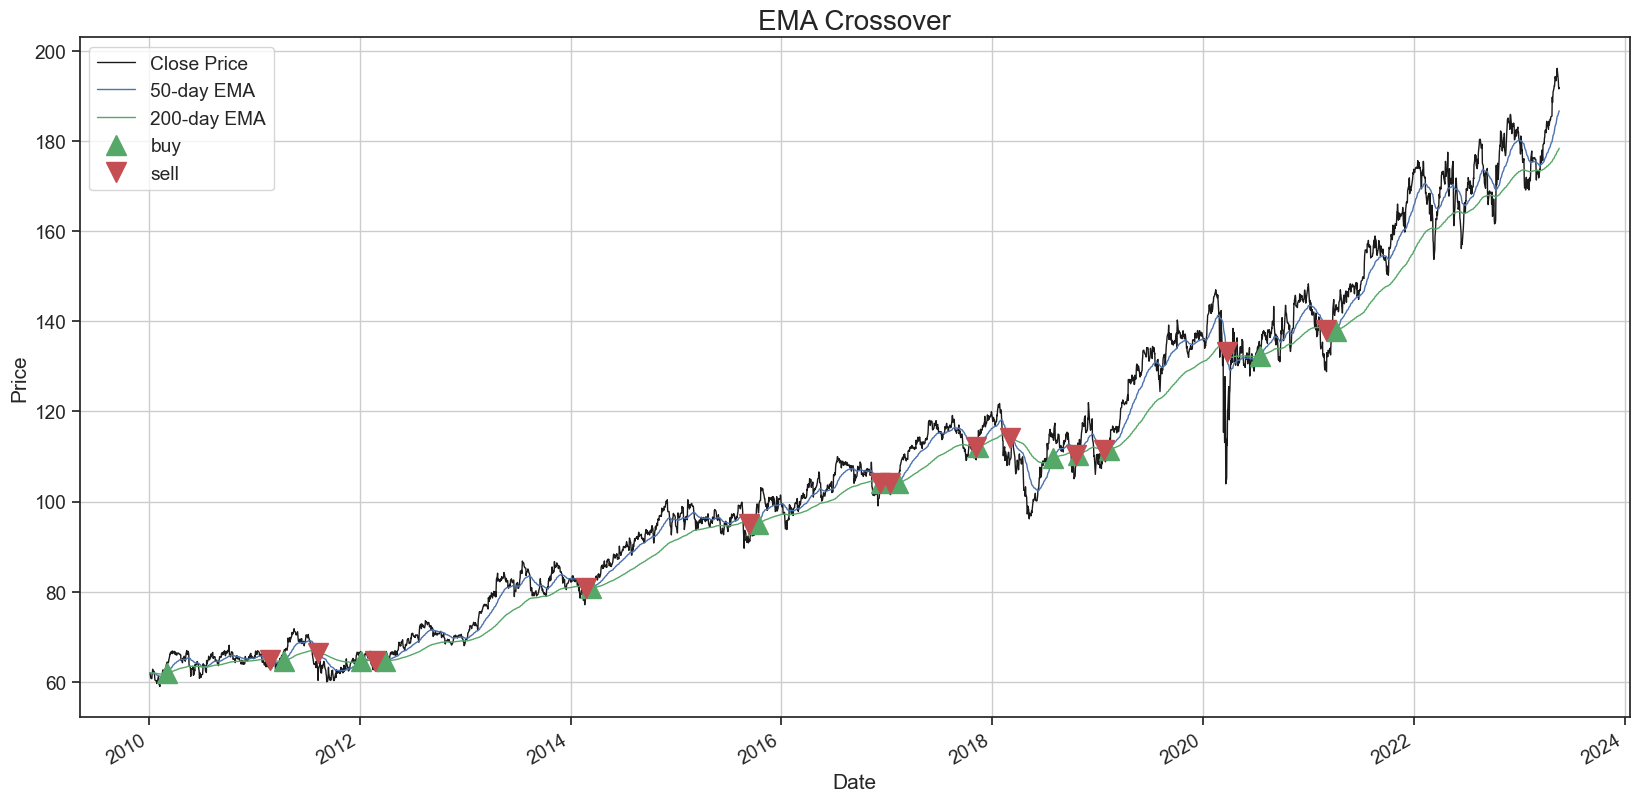

In [117]:
# Create 50 days exponential moving average column
df['50_EMA'] = df['Close'].ewm(span = 50, adjust = False).mean()
# Create 200 days exponential moving average column
df['200_EMA'] = df['Close'].ewm(span = 200, adjust = False).mean()
# create a new column 'Signal' such that if 50-day EMA is greater   # than 200-day EMA then set Signal as 1 else 0
df['Signal'] = 0.0  
df['Signal'] = np.where(df['50_EMA'] > df['200_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
df['Position'] = df['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['50_EMA'].plot(color = 'b', lw = 1, label = '50-day EMA') 
df['200_EMA'].plot(color = 'g', lw = 1, label = '200-day EMA')
# plot 'buy' and 'sell' signals
plt.plot(df[df['Position'] == 1].index, df['50_EMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, df['200_EMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

**After calculating the initial EMA value, we can use the following formula to calculate the EMA for the next period:**

* **EMA[today] = (Price[today] - EMA[yesterday]) * (2 / (1 + N)) + EMA[yesterday]**

**Strategy:**
* If 50-day moving average > 200-day moving average, it is a bullish signal
* If 50-day moving average < 200-day moving average, it is a bearish signal.

### **Observations**

* This code will plot a graph with the stock price, EMA, buy signals as green triangles, and sell signals as red triangles. The buy and sell signals are determined by comparing the EMA with the stock price.

***Some insights that we can gather from this graph include:***

* The stock price seems to follow the EMA closely, indicating that the EMA is a good indicator of the stock's trend.
* The buy and sell signals can be used to time the trades, as they indicate when the stock price is expected to rise or fall.
* There are some false signals in the buy and sell signals, which may result in losses if acted upon. 
* Therefore, it's important to use these signals in conjunction with other indicators and perform thorough analysis before making any trading decisions.

### **MACD Technical Indicator**
* The Moving Average Convergence Divergence (MACD) indicator is one of the most popular technical oscillator indicators.
* It helps us understand the relationship between the moving averages. Convergent is when the lines move closer to each other and divergence is when the lines move away from each other. The lines here are the moving averages.
* MACD is a trend-following momentum indicator. It can help us assess the relationship between two moving averages of prices. Subsequently, the MACD indicator can be used to compute a trading strategy that signals us when to buy or sell a stock. 
* Before I begin, it's worth mentioning that a moving average is a rolling average value of a predefined historic period. As an instance, the simple 10-day moving average is computed by calculating the average of the past 10 days period. The exponential moving average, on the other hand, assigns higher importance to the recent values. It can help us capture the movements of a stock price better.


---


* **Three main steps to calculate MACD:** 
* Step 1: Calculate the MACD line:
  * Calculate the 26-day exponentially weighted moving average of the price. This is the long term line.
  * Calculate the 12-day exponentially weighted moving average of the price. This is the short term line.
  * Calculate the difference between the 26-day EMA and 12-day EMA lines. This is the MACD line.
* Step 2: Calculate the Signal line from the MACD line:
  * Calculate the 9 days exponentially weighted moving average of the MACD line. This is known as the signal line.
* Step 3: Compute the histogram: Distance between MACD and the Signal
  * We can then calculate the difference between the MACD and the Signal line and then plot it as a histogram. The histogram can help us find when the cross-over is about to happen.

* ***The histogram is the difference between MACD and the Signal line***


* The histogram's length can be used to understand the trend better. When the histogram bars are not increasing then it can imply that the prices are not volatile and a big move might happen in the opposite direction soon.

* Although the usual approach is to use the parameters as described above but it really depends on the stock, the market, and the investor. We can choose different parameters and optimize the parameters that meet our trading style and the stock we are interested in.


---


**Strategy:**
* We can use the cross-over between MACD and the Signal line to create a simple trading strategy. This is where the MACD line and the signal line cross over each other.
  * Sell Signal: The cross over: When the MACD line is below the signal line.
  * Buy Signal: The cross over: When the MACD line is above the signal line

**Bullish vs Bearish:**
  * Bearish: When the MACD and Signal lines are below 0 then the market is bearish.
  * Bullish: When the MACD and Signal lines are above 0 then the market is bullish.

---

**Key Points**
* MACD is based on moving averages which imply that the past can impact the future. This is not always true. Additionally, there is a lag present due to the moving averages hence the generated signals are after the move has started.

* The standard setting for MACD is the difference between the 12- and 26-period EMAs. We could use MACD(5,35,5) for more sensitive stocks and MACD(12,26,9) might be better suited for weekly charts. It all depends on the investor.

* One keynote to remember is to always analyze the short and long-term price trend along with other factors. And rememeber sometimes a stock that might appear overbought might still move upwards due to other market factors.

In [118]:
!pip install ta==0.10.2

In [119]:
from ta.trend import MACD

In [120]:
def generate_buy_sell_signals(condition_buy, condition_sell, dataframe, strategy):
    last_signal = None
    indicators = []
    buy = []
    sell = []
    for i in range(0, len(dataframe)):
        # if buy condition is true and last signal was not Buy
        if condition_buy(i, dataframe) and last_signal != 'Buy':
            last_signal = 'Buy'
            indicators.append(last_signal)
            buy.append(dataframe['Close'].iloc[i])
            sell.append(np.nan)
        # if sell condition is true and last signal was Buy
        elif condition_sell(i, dataframe)  and last_signal == 'Buy':
            last_signal = 'Sell'
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(dataframe['Close'].iloc[i])
        else:
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(np.nan)

    dataframe[f"{strategy}_Last_Signal"] = np.array(last_signal)
    dataframe[f"{strategy}_Indicator"] = np.array(indicators)
    dataframe[f"{strategy}_Buy"] = np.array(buy)
    dataframe[f"{strategy}_Sell"] = np.array(sell)

In [121]:
def get_macd(company):
    close_prices = company['Close']
    window_slow = 26
    signal = 9
    window_fast = 12
    macd = MACD(close_prices, window_slow, window_fast, signal)
    company['MACD'] = macd.macd()
    company['MACD_Histogram'] = macd.macd_diff()
    company['MACD_Signal'] = macd.macd_signal()

    generate_buy_sell_signals(
    lambda x, company: company['MACD'].values[x] < company['MACD_Signal'].iloc[x],
    lambda x, company: company['MACD'].values[x] > company['MACD_Signal'].iloc[x],
    company,
    'MACD')
    return company

In [122]:
def plot_price_and_signals(fig, company, data, strategy, axs):
    last_signal_val = data[f"{strategy}_Last_Signal"].values[-1]
    last_signal = 'Unknown' if not last_signal_val else last_signal_val
    title = f'Close Price Buy/Sell Signals using {strategy}.  Last Signal: {last_signal}'
    fig.suptitle(f'Top: Pepsi Stock Price. Bottom: {strategy}')

    if not data[f'{strategy}_Buy'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
    if not data[f'{strategy}_Sell'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
    axs[0].plot(company['Close'], label='Close Price', color='blue', alpha=0.35)

    plt.xticks(rotation=45)
    axs[0].set_title(title)
    axs[0].set_xlabel('Date', fontsize=20)
    axs[0].set_ylabel('Close Price', fontsize=18)
    axs[0].legend(loc='upper left')
    axs[0].grid()

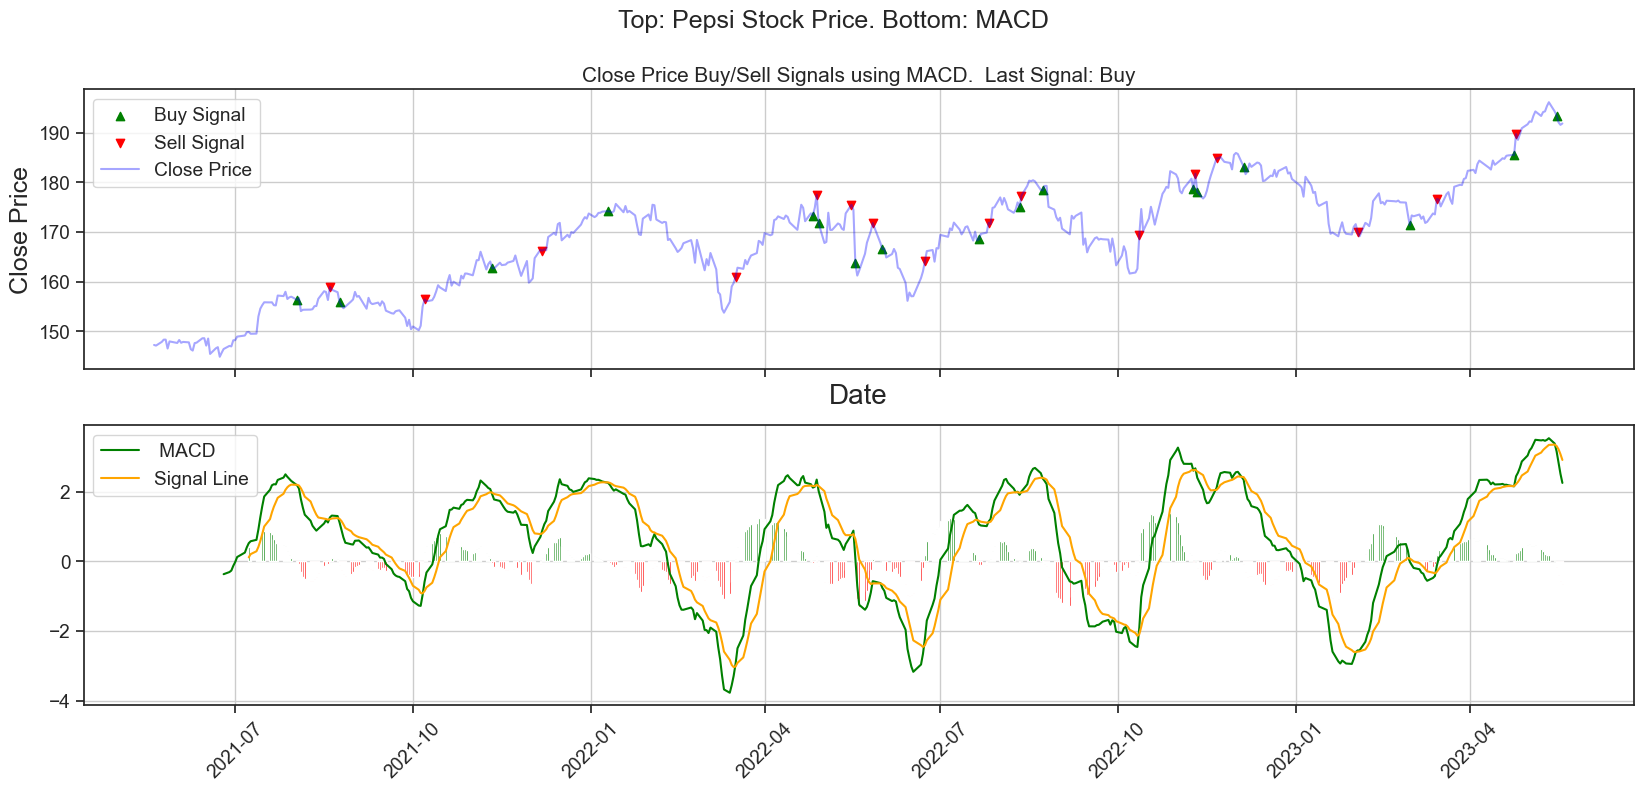

In [123]:
def plot_macd(company):
    macd = company
    # Create and plot the graph
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,8))
    plot_price_and_signals(fig, company, macd, 'MACD', axs)

    axs[1].plot(macd['MACD'], label=' MACD', color = 'green')
    axs[1].plot(macd['MACD_Signal'], label='Signal Line', color='orange')
    positive = macd['MACD_Histogram'][(macd['MACD_Histogram'] >= 0)]
    negative = macd['MACD_Histogram'][(macd['MACD_Histogram'] < 0)]
    axs[1].bar(positive.index, positive, color='green')
    axs[1].bar(negative.index, negative, color='red')    
    axs[1].legend(loc='upper left')
    axs[1].grid()
    # print(os.path.abspath(image))
    plt.show()
plot_macd(get_macd(df.iloc[-504:]))

### **RSI Technical Indicator**
* RSI stands for Relative Strength Index. It's a widely used technical indicator and this is mainly due to its simplicity. It relies on the market and we can use the indicator to determine when to buy or sell a stock.

* RSI requires us to compute the recent gains and losses. The recent specified time period is subjective in nature. We use the RSI indicator to measure the speed and change of price movements.

* RSI is an oscillating indicator. It can help us understand the momentum better. Note, momentum is the change of price and size. Therefore, the RSI indicator can help us understand when the stock price will change its trend.

* The key to using this indicator is to understand whether a stock is overbought or oversold.

---

**Calculation:**
* The calculation is extremely simple.

  * Firstly, we have to determine the time period. Usually, a 14 day time period is chosen but it could depend on the investor's own view of the market and the stock.
  * Secondly, we have to compute the relative strength which is known as RS. RS is the average gain over the average loss. To explain it further, RS is the average gain when the price was moving up over the average loss when the price change was negative.
  * Calculate RSI as 100 — (100/(1+RS))
  * The RSI value is between 0–100
---
**Strategy:**
* **Overbought:** When the RSI is above 70%. Essentially, overbought is when the price of a stock has increased quickly over a small period of time, implying that it is overbought.
* The price of an overbought stock usually decreases in price.
* **Oversold:** When the RSI is below 30%. Essentially, oversold is when the price of a stock has decreased quickly over a small period of time, implying that it is oversold. The price of an oversold stock usually increases in price.

* There are way too many strategies that are dependent on the RSI indicator.

* A simple strategy is to use the RSI such that:

* **Sell:** When RSI increases above 70%

* **Buy:** When RSI decreases below 30%.

* We might decide to use different parameters. The point is that we can optimize the parameters that meet our trading style, the market and the stock we are interested in.

---

**Key Points**
* The signals are not always accurate. The RSI signals are dependent on the price of the stock only and this is not the only factor that can change the price of a stock. Plus it's highly subjective.

* As an instance, a company can launch a product when a stock is oversold and that could further increase the price of the stock.

* Therefore, always consider the market factors and also use the short and long term price trend when buying or selling a stock.

In [124]:
from ta.momentum import RSIIndicator
# from ta.volatility import BollingerBands

def get_rsi(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators
    rsi_time_period = 20

    rsi_indicator = RSIIndicator(close_prices, rsi_time_period)
    company['RSI'] = rsi_indicator.rsi()

    low_rsi = 40
    high_rsi = 70

    generate_buy_sell_signals(
        lambda x, company: company['RSI'].values[x] < low_rsi,
        lambda x, company: company['RSI'].values[x] > high_rsi,
    company, 'RSI')

    return company

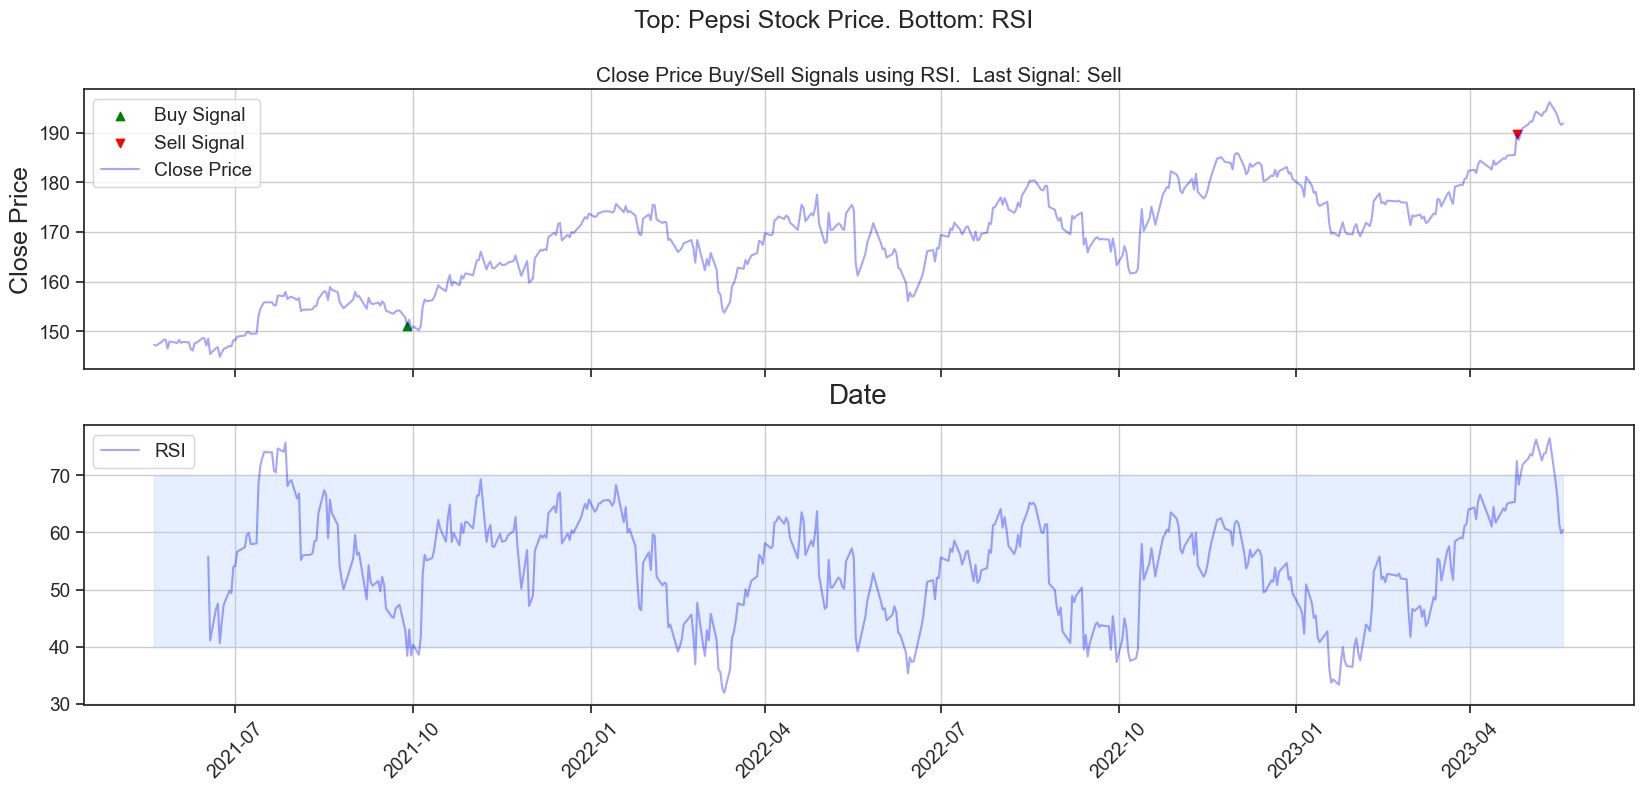

In [125]:
def plot_rsi(company):
      # image = f'images/{company.symbol}_rsi.png'
      rsi = company
      low_rsi = 40
      high_rsi = 70

      #plt.style.use('default')
      fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
      plot_price_and_signals(fig, company, rsi, 'RSI', axs)
      axs[1].fill_between(rsi.index, y1=low_rsi, y2=high_rsi, color='#adccff', alpha=0.3)
      axs[1].plot(rsi['RSI'], label='RSI', color='blue', alpha=0.35)
      axs[1].legend(loc='upper left')
      axs[1].grid()
      plt.show()
plot_rsi(get_rsi(df.iloc[-504:]))

### **Bollinger Bands Technical Indicator**
* It is one of the most popular technical indicators. And this is mainly due to its simplicity.

* There are two main components of a Bollinder band indicator:
  1. Volatility Bolinger Bands
  2. Moving averages
---
* **Essentially, the steps are:**
  * Middle band: Calculate the moving average of the price, usually 20 days moving average.
  * Upper band: Calculate two standard deviations above the moving average.
  * Lower band: Calculate two standard deviations below the moving average.

* The more volatile the stock prices, the wider the bands from the moving average. It's important to look at the shape/trend of the bands along with the gap between them to understand the trend and stock better.

* The standard deviations capture the volatile movements and hence we compute standard deviations above and below the upper and lower bands to capture the outliers. Consequently, 95% of the price movements will fall between the two standard deviations
---
* **Strategy:**
* A simple trading strategy could be to:
  * Sell: As soon as the market price touches the upper Bollinger band
  * Buy: As soon as the market price touches the lower Bollinger band

* This is based on the assumption that the stock must fall back (from the uptrend) and eventually touch the bottom band.
* At times, the Bollinger Band Indicator signals us to buy a stock but an external market event such as negative news can change the price of the stock. Therefore it's important to use the indicator as just an indicator that can sometimes be wrong.

In [126]:
from ta.volatility import BollingerBands
def get_bollinger_bands(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators

    window = 20
    indicator_bb = BollingerBands(close=close_prices, window=window, window_dev=2)

    # Add Bollinger Bands features
    company['Bollinger_Bands_Middle'] = indicator_bb.bollinger_mavg()
    company['Bollinger_Bands_Upper'] = indicator_bb.bollinger_hband()
    company['Bollinger_Bands_Lower'] = indicator_bb.bollinger_lband()

    generate_buy_sell_signals(
        lambda x, company: company['Close'].values[x] < company['Bollinger_Bands_Lower'].values[x],
        lambda x, company: company['Close'].values[x] > company['Bollinger_Bands_Upper'].values[x],
        company, 'Bollinger_Bands')

    return company

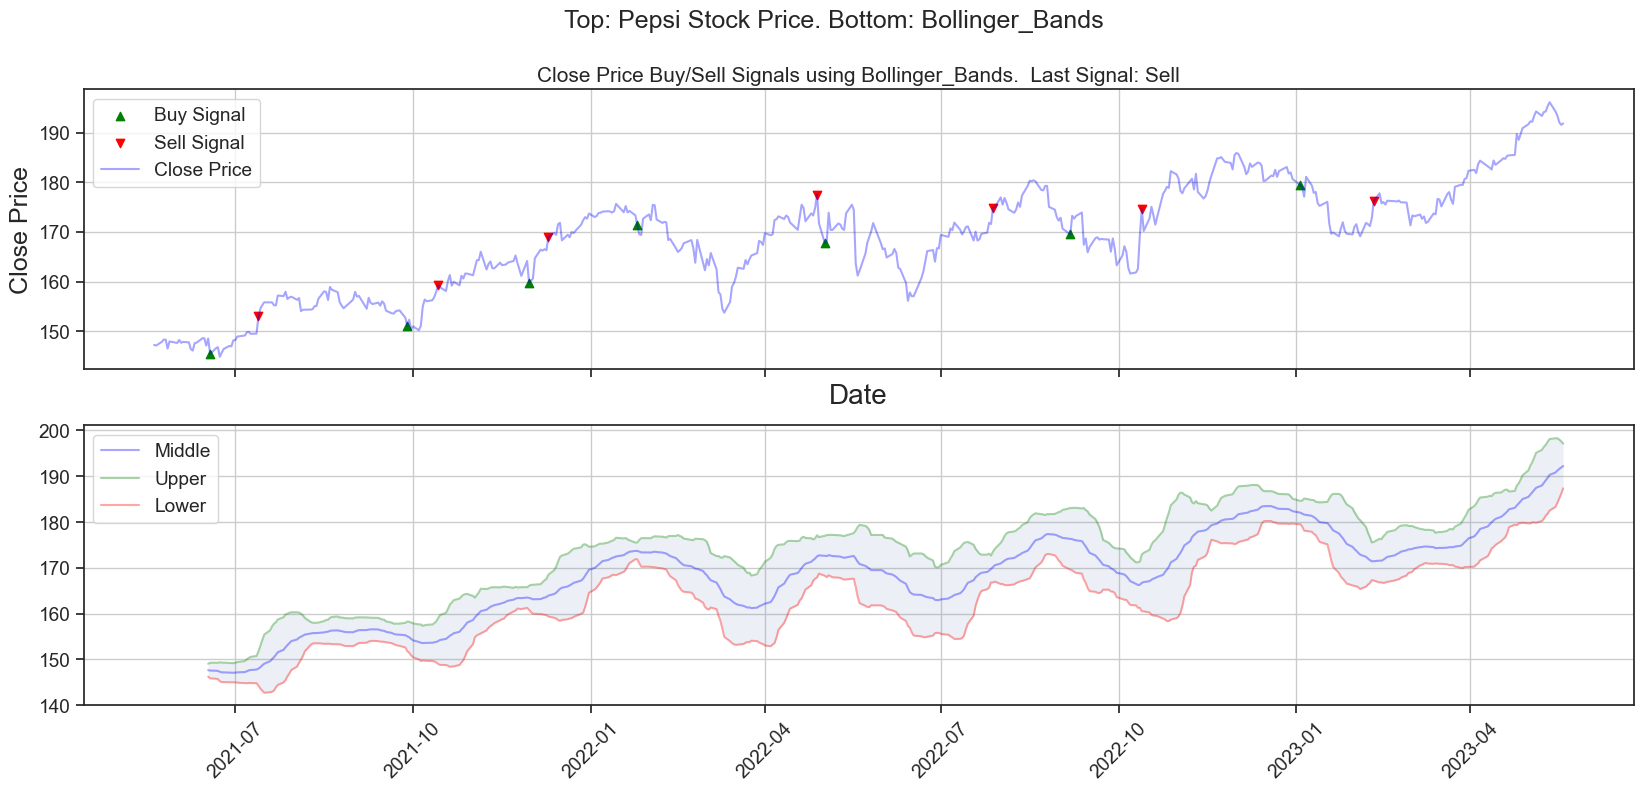

In [127]:
def plot_bollinger_bands(company):
        # image = f'images/{company.symbol}_bb.png'
        bollinger_bands = company

        fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
        plot_price_and_signals(fig, company, bollinger_bands, 'Bollinger_Bands', axs)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Middle'], label='Middle', color='blue', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Upper'], label='Upper', color='green', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Lower'], label='Lower', color='red', alpha=0.35)
        axs[1].fill_between(bollinger_bands.index, bollinger_bands['Bollinger_Bands_Lower'], bollinger_bands['Bollinger_Bands_Upper'], alpha=0.1)
        axs[1].legend(loc='upper left')
        axs[1].grid()

        plt.show()
plot_bollinger_bands(get_bollinger_bands(df.iloc[-504:]))

* The library has a bonus function. We can add all of the available technical indicators that have been coded in the ta library by calling the add_all_ta_features function.

* For this code to work, create a dataframe and ensure it contains the Open, High, Low and Close columns.

In [128]:
# df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume_BTC", fillna=True)

**Conclusion**
* The signals generated by the technical indicators are theoretical in nature. * There is no guarantee that the signals are going to be absolutely applicable all the time. Plus the market can behave in an unexpected manner.
* Investors can lose some, if not all, of their investments therefore the indicators should be used wisely. It's important to note that stock investment should not be taken lightly. On top of that, the market can not always be timed.
* Usually, the technical indicators are combined together to achieve a better indicator. As an instance, the Bollinger band and MACD indicators can be combined with the RSI measure to better decide whether it is the right time to buy/sell.
* It is important to adjust the parameters and decide the optimum trading strategy based on your view of the market, your trading style, and the investment stock. Always backtest the trading strategy.

**Resource**
* https://towardsdatascience.com/data-analysis-visualization-in-finance-technical-analysis-of-stocks-using-python-269d535598e4
* https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a
* https://medium.com/fintechexplained/automating-stock-investing-technical-analysis-with-python-81c669e360b2
* https://medium.com/fintechexplained/speaking-traders-language-14a22df720a6
* https://medium.com/fintechexplained/automating-stock-investing-fundamental-analysis-with-python-f854781ee0b4
* https://www.investopedia.com/terms/t/todayslow.asp
* https://technical-analysis-library-in-python.readthedocs.io/en/latest/

**Yahoo finance github link and syntax:**
* https://github.com/ranaroussi/yfinance


# **<center>THE END</center>**